#COMP551 Project 2

Members:


1.   Connia
2.   Joseph
3.   Derek

We begin this project with some small visualizations of the ISOLET dataset. We noticed there were no missing values in features or labels, and that there was no categorical data, all values were of type float. This was nice to see, and we decided minimal data clearning and preprocessing steps were needed on this dataset.






In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt 
import numpy as np
from mlxtend.plotting import plot_decision_regions
from numpy import random
from sklearn.decomposition import PCA
import warnings
import scipy
import pandas as pd
warnings.filterwarnings("ignore")

#Exploratory Analysis
isolet_df_x, isolet_df_y = fetch_openml(name = 'isolet', return_X_y = True, as_frame = True)
print("\n\nNumber of features in the dataset :\n",'#' * 40)
print("\nFeatures Set : \n",'-' * 20, len(isolet_df_x.columns))

print("\n\nFeatures in the dataset :\n",'#' * 40)
print("\nFeatures Set : \n", list(isolet_df_x.columns))

print("\n\nDatatypes of features and labels in the dataset :\n",'#' * 40)
print("\nFeatures Set : \n",'-' * 20,"\n", isolet_df_x.dtypes)
print("\nLabels Set : \n",'-' * 20,"\n",isolet_df_y.dtypes)

print("\n\nNumber of observations in the dataset :\n",'#' * 40)
print("\nFeatures Set : \n",'-' * 20,len(isolet_df_x))
print("\nLabels Set : \n",'-' * 20,len(isolet_df_y))

print("\n\nEmpty cells or Nans in the dataset :\n",'#' * 40)
print("\nFeatures Set : \n",'-' * 20,isolet_df_x.isnull().values.any())
print("\nLabels Set : \n",'-' * 20,isolet_df_y.isnull().values.any())

print("\n\nNumber of empty cells or Nans in the dataset :\n",'#' * 40)
print("\nFeatures Set : \n",'-' * 20,"\n", isolet_df_x.isnull().sum())
print("\nLabels Set : \n",'-' * 20,"\n", isolet_df_y.isnull().sum())

dX, dy = datasets.load_digits(return_X_y=True)

bx,by = fetch_openml(name='isolet', return_X_y= True)
by = [int(i) for i in by]
by = [x - 1 for x in by]
by = np.array(by)

# Utility Functions
crossentropyloss = lambda y, yh: (-1 / y.shape[0]) * np.sum(y * np.log(yh)) 
def softmax(z):
    z_bar = (z.T-np.max(z,axis = 1)).T 
    y_hat = (np.exp(z_bar).T / np.sum(np.exp(z_bar), axis=1)).T
    return y_hat
def one_hot_encoding(size,y):
  onehotencoding = scipy.sparse.csr_matrix((np.ones(size), (y, np.array(range(size)))))
  onehotencoding = np.array(onehotencoding.todense()).T
  return onehotencoding



Number of features in the dataset :
 ########################################

Features Set : 
 -------------------- 617


Features in the dataset :
 ########################################

Features Set : 
 ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 

# Gradient Descent & Softmax Regression With Early Stopping Criteria

In this section we will employ two classes GradientDescent and Softmax Regression. 



> The inner gradient function in the Softmax fit function is passed through to the *run* function from Gradient Descent by using the optimizer as a parameter for *fit*. Validation sets were also passed through in both functions for the termination condition.


We decided to use bias on the weights of the gradient. 


In [ ]:
# Gradient Descent with Early Stopping Criteria
class GradientDescent:

    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, beta=0.05, batch_size=50, record_history=True, termination = True):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        self.beta = beta
        self.batch_size = batch_size
        self.mini_batches = []
        self.losses = []
        self.validloss = []
        self.T = 0
        self.termination = termination

        if record_history:
            self.w_history = []  # to store the weight history for visualization

    def run(self, gradient_fn, x, y, w, x_valid,y_valid,bias):
        grad = np.inf
        t = 1 ## number of iterations
        m = x.shape[0]
        random_ids = random.choice(m, m, replace=False)
        mini_batches = [(x[i:i + self.batch_size, :], y[i:i + self.batch_size]) for i in range(0, m, self.batch_size)]

        while np.linalg.norm(grad) > self.epsilon:
            for mini_batch in mini_batches:
                x_mini = mini_batch[0]
                y_mini = mini_batch[1]
                loss, grad = gradient_fn(x, y, w)  # compute the gradient with present weight
                self.losses.append(loss)
                deltaw = self.beta * w + (1-self.beta)*grad
                w = w - self.learning_rate * deltaw  # weight update step 

            if self.record_history:
                self.w_history.append(w)
                t += 1
            # Termination condition
            if self.termination:
              if bias:
                N = x_valid.shape[0]
                x_valid = np.column_stack([x_valid, np.ones(N)])
                bias = False
              z_valid_pred = x_valid @ w
              y_valid_pred = softmax(z_valid_pred)
              yv = one_hot_encoding(y_valid.shape[0],y_valid)
              l = crossentropyloss(yv, y_valid_pred)
              if len(self.validloss) == 0:
                self.validloss.append(l)
              else:
                if round(self.validloss[len(self.validloss)-1],5) <= round(l,5): 
                  self.T += 1
                if self.T>20: 
                  break
                else: 
                  self.validloss.append(l)
            else: 
                if t>= self.max_iters: 
                  break
        return w

In [ ]:

class SoftmaxRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y, optimizer, x_valid , y_valid):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        def gradient(x, y, w):  
            N = x.shape[0]
            Y = y.shape[0]
            y = one_hot_encoding(Y,y)
            # Softmax
            z = np.dot(x, w)
            y_hat = softmax(z)
            loss = (-1 / N) * np.sum(y * np.log(y_hat)) 
            gradient = (-1 / N) * np.dot(x.T, (y - y_hat))   
            return loss, gradient

        w0 = np.zeros([x.shape[1],len(np.unique(y))]) # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0, x_valid,y_valid,self.add_bias)  # run the optimizer to get the optimal weights
        return self

    def predict(self, x):
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        z = x @ self.w
        yh = softmax(z)
        return yh
    
    def accuracy(self,x,y):
      pred = self.predict(x)
      prob = np.argmax(pred,axis=1)
      accuracy = sum(prob == y)/(float(len(y)))
      return accuracy

# **Hyper-parameter Tunning**

# **Experiments with Learning Rates**

These section presents experiments with varying learning rates while keep other parameters constant. We tested two scenarios:


*   Investigating training and validation accuracy with execution time using early stopping
*   Investigating training and validation accuracy with execution time without using early stopping



In [ ]:
# USING EARLY STOPING with Varying Learning Rate
# Set earlyStop using True/False

import numpy as np
import pandas as pd
from datetime import datetime

def ParameterTuning(whichPar, dX, dy, earlyStop):

  optimizer = GradientDescent(learning_rate =whichPar, max_iters = 100, beta = 0.05, batch_size = 50, record_history = True, termination = earlyStop) # Tunning Learning Rate
  model = SoftmaxRegression()

  k=5 # Number of Cross Validation
  dXX=pd.DataFrame(dX)
  dYY=pd.DataFrame(dy)
  n= (len(dXX) // k)

  cvTrainAccuracy = []
  cvTestAccuracy = []
  cvRuntime = []

  for i in range(k):
    A=i*n
    B=(i+1)*n
    
    X1 = dXX[A:B].to_numpy()
    X2_1 = dXX[:A].to_numpy()
    X2_2 = dXX[B:].to_numpy()
    X2=np.concatenate((X2_1, X2_2), axis=0)
    
    X11 = dYY[A:B].values.flatten()
    X22_1 = dYY[:A].values.flatten()
    X22_2 = dYY[B:].values.flatten()
    X22=np.concatenate((X22_1, X22_2), axis=None)

    dX_train = X2
    dy_train = X22
    dX_test = X1
    dy_test = X11

    start=datetime.now()
    model.fit(dX_train, dy_train, optimizer, dX_test, dy_test)
    #model.fit(dX_train, dy_train, optimizer)
    
    saat = (datetime.now()-start).total_seconds()
    #print(saat)
    cvRuntime.append(saat)
    losses = optimizer.losses

    trainAccuracy = model.accuracy(dX_train,dy_train)
    cvTrainAccuracy.append(trainAccuracy)

    testAccuracy = model.accuracy(dX_test,dy_test)
    cvTestAccuracy.append(testAccuracy)

  KFold_TestAccuracy = np.mean(cvTestAccuracy);
  KFold_TrainAccuracy = np.mean(cvTrainAccuracy);
  KFold_RunTime = np.mean(cvRuntime);
  return KFold_TrainAccuracy, KFold_TestAccuracy, KFold_RunTime 


# Digit Dataset

In [ ]:
# Dataset 1: Hyperamater tunning for Learning Rate
lrList = [0.001, 0.002, 0.005, 0.008, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1.0]

# BEST: 0.01

lrTrainAccES = [] # Training accuracy results for Early stopping (ES)
lrTestAccES = [] # Validation accuracy results for Early stopping (ES)
lrRunTimeES = [] # Run-time results for Early stopping (ES)
lrTrainAccNoES = [] # Training accuracy results WITHOUT Early stopping (NoES)
lrTestAccNoES = [] # Validation accuracy results WITHOUT Early stopping (NoES)
lrRunTimeNoES = [] # Run-time results WITHOUT Early stopping (NoES)

import warnings
warnings.filterwarnings("ignore")

for j in lrList:
  trainAc1, testAcc1, execTime1 = ParameterTuning(j, dX, dy, True)
  trainAc2, testAcc2, execTime2 = ParameterTuning(j, dX, dy, False)
  print('lR=',j,'; trainAcES=',trainAc1,'; testAccES=',testAcc1,'; execTimeES=',execTime1)
  print('lR=',j,'; trainAcNoES=',trainAc2,'; testAccNoES=',testAcc2,'; execTimeNoES=',execTime2)
  print('    ')
  lrTrainAccES.append(trainAc1)
  lrTestAccES.append(testAcc1)
  lrRunTimeES.append(execTime1)
  lrTrainAccNoES.append(trainAc2)
  lrTestAccNoES.append(testAcc2)
  lrRunTimeNoES.append(execTime2)

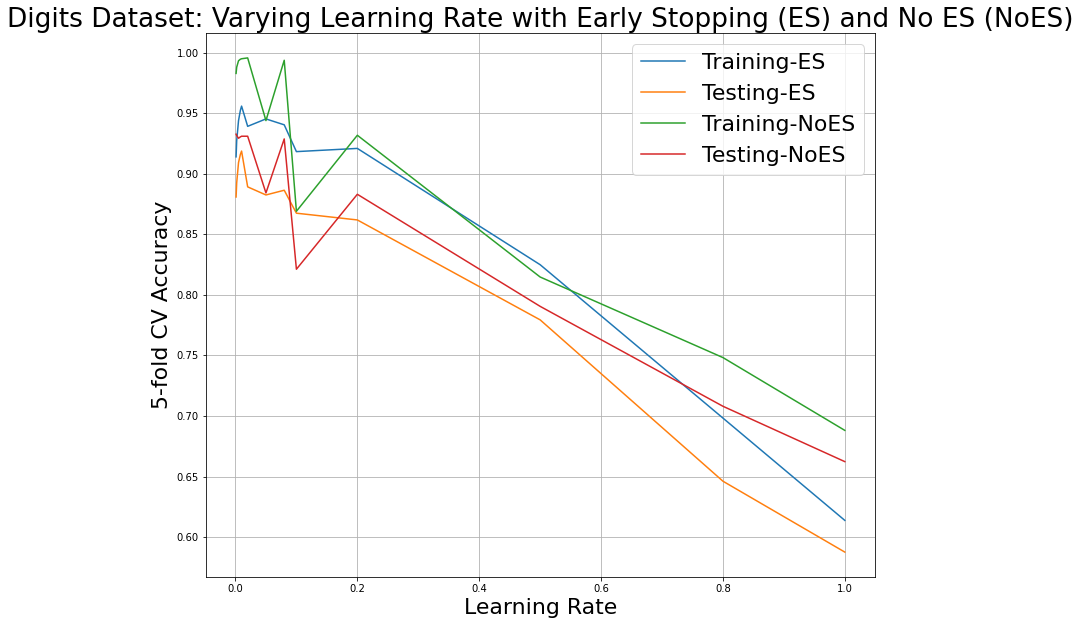

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
#plt.xticks(np.arange(min(lrList), max(lrList)+1, 1.0))
plt.plot(lrList,lrTrainAccES)
plt.plot(lrList,lrTestAccES)
plt.plot(lrList,lrTrainAccNoES)
plt.plot(lrList,lrTestAccNoES)
plt.xlabel("Learning Rate", fontsize=22)
plt.ylabel('5-fold CV Accuracy', fontsize=22)
plt.rcParams.update({'font.size': 22})
plt.title('Digits Dataset: Varying Learning Rate with Early Stopping (ES) and No ES (NoES)')
plt.grid(True)
plt.legend(["Training-ES", "Testing-ES", "Training-NoES", "Testing-NoES"])
plt.show()

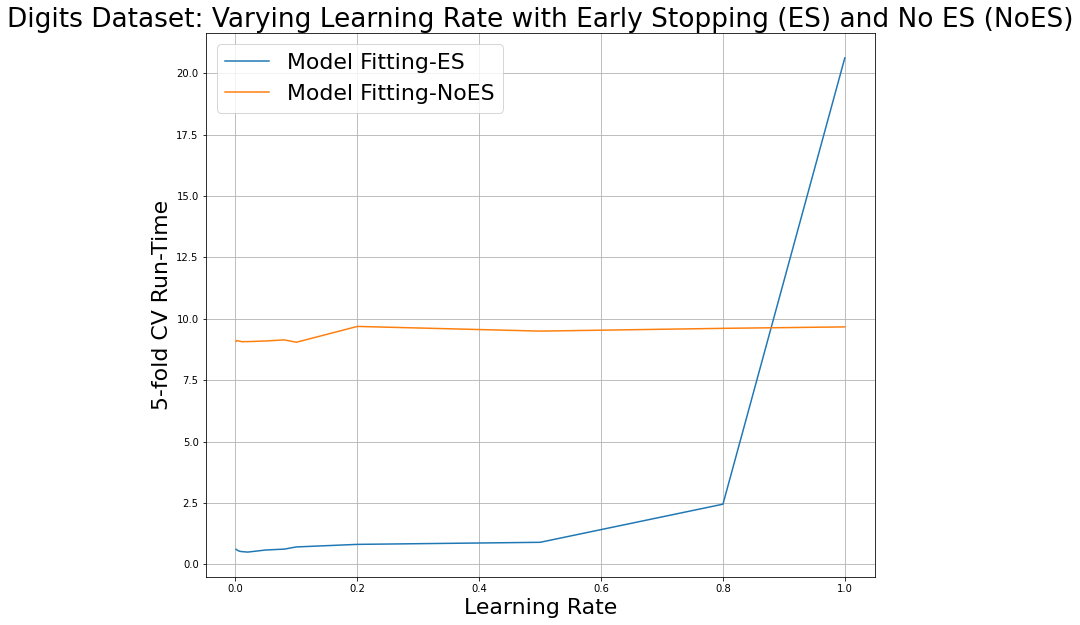

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.plot(lrList,lrRunTimeES)
plt.plot(lrList,lrRunTimeNoES)
plt.xlabel("Learning Rate", fontsize=22)
plt.ylabel('5-fold CV Run-Time', fontsize=22)
plt.rcParams.update({'font.size': 22})
plt.title('Digits Dataset: Varying Learning Rate with Early Stopping (ES) and No ES (NoES)')
plt.grid(True)
plt.legend(["Model Fitting-ES", "Model Fitting-NoES"])
plt.show()

# Isolet Dataset

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
# Isolet Dataset 2: Hyperamater tunning for Learning Rate
lrList = [0.001, 0.002, 0.005, 0.008, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1.0]

# BEST: 0.2

lrTrainAccES2 = [] # Training accuracy results for Early stopping (ES)
lrTestAccES2 = [] # Validation accuracy results for Early stopping (ES)
lrRunTimeES2 = [] # Run-time results for Early stopping (ES)
lrTrainAccNoES2 = [] # Training accuracy results WITHOUT Early stopping (NoES)
lrTestAccNoES2 = [] # Validation accuracy results WITHOUT Early stopping (NoES)
lrRunTimeNoES2 = [] # Run-time results WITHOUT Early stopping (NoES)

import warnings
warnings.filterwarnings("ignore")

for j in lrList:
  trainAc21, testAcc21, execTime21 = ParameterTuning(j, bx,by, True)
  print('lR=',j,'; trainAcES=',trainAc21,'; testAccES=',testAcc21,'; execTimeES=',execTime21)
  #trainAc22, testAcc22, execTime22 = ParameterTuning(j, bx,by, False)
  #print('lR=',j,'; trainAcNoES=',trainAc22,'; testAccNoES=',testAcc22,'; execTimeNoES=',execTime22)
  print('    ')
  lrTrainAccES2.append(trainAc21)
  lrTestAccES2.append(testAcc21)
  lrRunTimeES2.append(execTime21)
  #lrTrainAccNoES2.append(trainAc22)
  #lrTestAccNoES2.append(testAcc22)
  #lrRunTimeNoES2.append(execTime22)

lR= 0.001 ; trainAcES= 0.8076947739660147 ; testAccES= 0.7953816549069918 ; execTimeES= 55.074913800000004
    
lR= 0.002 ; trainAcES= 0.8199102276370631 ; testAccES= 0.8089801154586272 ; execTimeES= 51.1333866
    
lR= 0.005 ; trainAcES= 0.8399487015068934 ; testAccES= 0.8260423348300193 ; execTimeES= 45.026317600000006
    
lR= 0.008 ; trainAcES= 0.8564604039756333 ; testAccES= 0.840795381654907 ; execTimeES= 42.92573180000001
    
lR= 0.01 ; trainAcES= 0.8664315485732607 ; testAccES= 0.8536241180243745 ; execTimeES= 41.282853
    
lR= 0.02 ; trainAcES= 0.8946457197819815 ; testAccES= 0.8824887748556767 ; execTimeES= 37.509179
    
lR= 0.05 ; trainAcES= 0.9167681949342738 ; testAccES= 0.9054522129570237 ; execTimeES= 35.3168366
    
lR= 0.08 ; trainAcES= 0.9268996473228599 ; testAccES= 0.9126363053239256 ; execTimeES= 34.0105264
    
lR= 0.1 ; trainAcES= 0.9316126963770438 ; testAccES= 0.9171263630532394 ; execTimeES= 34.04833359999999
    
lR= 0.2 ; trainAcES= 0.9409746713690283 ; t

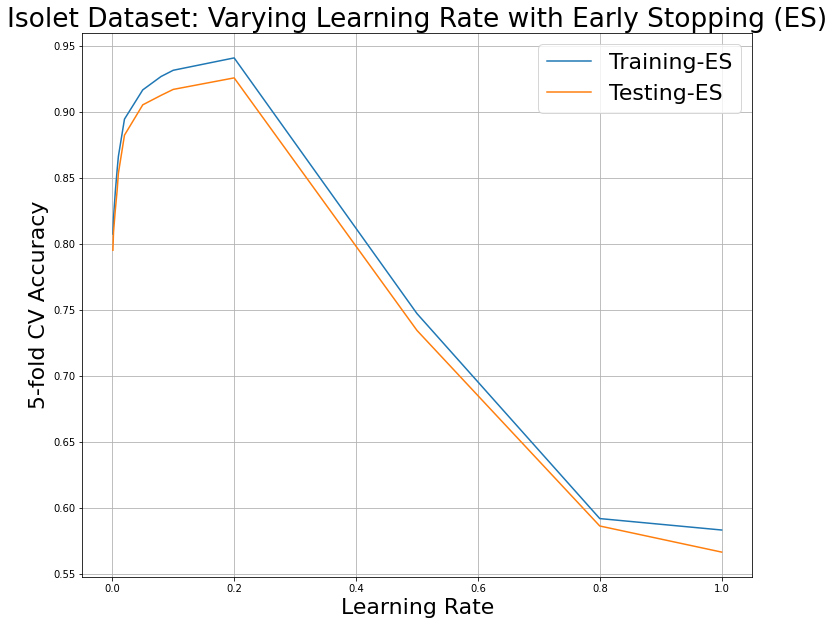

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.plot(lrList,lrTrainAccES2)
plt.plot(lrList,lrTestAccES2)
#plt.plot(lrList,lrTrainAccNoES2)
#plt.plot(lrList,lrTestAccNoES2)
plt.xlabel("Learning Rate", fontsize=22)
plt.ylabel('5-fold CV Accuracy', fontsize=22)
plt.rcParams.update({'font.size': 22})
plt.title('Isolet Dataset: Varying Learning Rate with Early Stopping (ES)')
#plt.title('Isolet Dataset: Varying Learning Rate with Early Stopping (ES) and No ES (NoES)')
plt.grid(True)
plt.legend(["Training-ES", "Testing-ES"])
#plt.legend(["Training-ES", "Testing-ES", "Training-NoES", "Testing-NoES"])
plt.show()

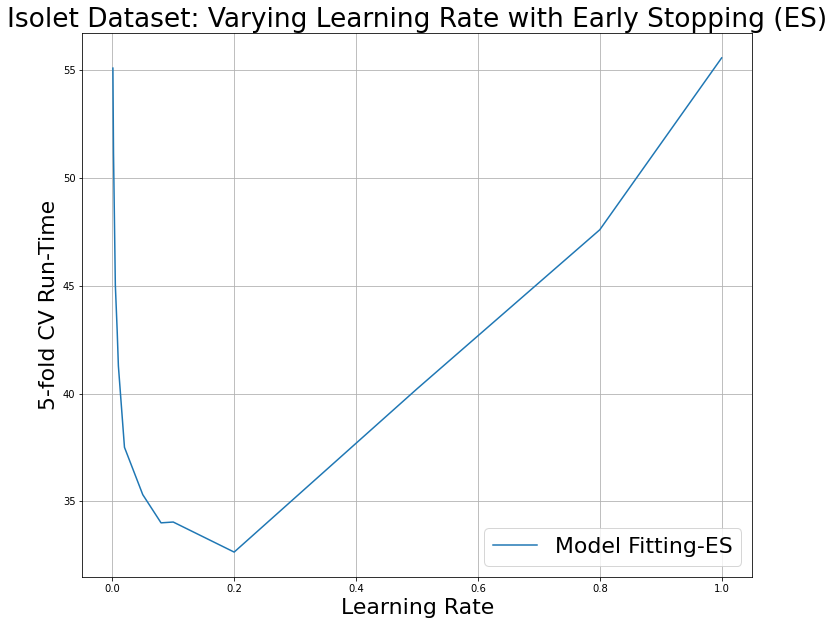

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.plot(lrList,lrRunTimeES2)
#plt.plot(lrList,lrRunTimeNoES2)
plt.xlabel("Learning Rate", fontsize=22)
plt.ylabel('5-fold CV Run-Time', fontsize=22)
plt.rcParams.update({'font.size': 22})
plt.title('Isolet Dataset: Varying Learning Rate with Early Stopping (ES)')
#plt.title('Isolet Dataset: Varying Learning Rate with Early Stopping (ES) and No ES (NoES)')
plt.grid(True)
plt.legend(["Model Fitting-ES"])
#plt.legend(["Model Fitting-ES", "Model Fitting-NoES"])
plt.show()

# **Experiments with Beta**

These section presents experiments with Beta while keep other parameters constant. We tested two scenarios:


*   Investigating training and validation accuracy with execution time using early stopping
*   Investigating training and validation accuracy with execution time without using early stopping

In [ ]:
# USING EARLY STOPING with Varying Beta
# Set earlyStop using True/False

import numpy as np
import pandas as pd
from datetime import datetime

def TuningBeta(betaValue, lrValue, dX, dy, earlyStop):

  optimizer = GradientDescent(learning_rate =lrValue, max_iters = 100, beta = betaValue, batch_size = 50, record_history = True, termination = earlyStop) # Tunning Learning Rate
  model = SoftmaxRegression()

  k=5 # Number of Cross Validation
  dXX=pd.DataFrame(dX)
  dYY=pd.DataFrame(dy)
  n= (len(dXX) // k)

  cvTrainAccuracy = []
  cvTestAccuracy = []
  cvRuntime = []

  for i in range(k):
    A=i*n
    B=(i+1)*n
    
    X1 = dXX[A:B].to_numpy()
    X2_1 = dXX[:A].to_numpy()
    X2_2 = dXX[B:].to_numpy()
    X2=np.concatenate((X2_1, X2_2), axis=0)
    
    X11 = dYY[A:B].values.flatten()
    X22_1 = dYY[:A].values.flatten()
    X22_2 = dYY[B:].values.flatten()
    X22=np.concatenate((X22_1, X22_2), axis=None)

    dX_train = X2
    dy_train = X22
    dX_test = X1
    dy_test = X11

    start=datetime.now()
    model.fit(dX_train, dy_train, optimizer, dX_test, dy_test)
    #model.fit(dX_train, dy_train, optimizer)
    
    saat = (datetime.now()-start).total_seconds()
    #print(saat)
    cvRuntime.append(saat)
    losses = optimizer.losses

    trainAccuracy = model.accuracy(dX_train,dy_train)
    cvTrainAccuracy.append(trainAccuracy)

    testAccuracy = model.accuracy(dX_test,dy_test)
    cvTestAccuracy.append(testAccuracy)

  KFold_TestAccuracy = np.mean(cvTestAccuracy);
  KFold_TrainAccuracy = np.mean(cvTrainAccuracy);
  KFold_RunTime = np.mean(cvRuntime);
  return KFold_TrainAccuracy, KFold_TestAccuracy, KFold_RunTime 


# Digit Dataset

In [ ]:
# Dataset 1: Hyperamater tunning for Learning Rate
betaList = [0.001, 0.002, 0.005, 0.01, 0.02,0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 0.9, 1]

#TuningBeta(betaValue, lrValue, dX, dy, earlyStop):
# BEST Learning Rate: 0.01

betaTrainAccES = [] # Training accuracy results for Early stopping (ES)
betaTestAccES = [] # Validation accuracy results for Early stopping (ES)
betaRunTimeES = [] # Run-time results for Early stopping (ES)
betaTrainAccNoES = [] # Training accuracy results WITHOUT Early stopping (NoES)
betaTestAccNoES = [] # Validation accuracy results WITHOUT Early stopping (NoES)
betaRunTimeNoES = [] # Run-time results WITHOUT Early stopping (NoES)

import warnings
warnings.filterwarnings("ignore")

for ij in betaList:
  trainAc1, testAcc1, execTime1 = TuningBeta(ij, 0.01, dX, dy, True)
  trainAc2, testAcc2, execTime2 = TuningBeta(ij, 0.01, dX, dy, False)
  print('beta=',ij,'; trainAcES=',trainAc1,'; testAccES=',testAcc1,'; execTimeES=',execTime1)
  print('beta=',ij,'; trainAcNoES=',trainAc2,'; testAccNoES=',testAcc2,'; execTimeNoES=',execTime2)
  print('    ')
  betaTrainAccES.append(trainAc1)
  betaTestAccES.append(testAcc1)
  betaRunTimeES.append(execTime1)
  betaTrainAccNoES.append(trainAc2)
  betaTestAccNoES.append(testAcc2)
  betaRunTimeNoES.append(execTime2)

beta= 0.001 ; trainAcES= 0.9578581363004174 ; testAccES= 0.916991643454039 ; execTimeES= 0.6047406000000002
beta= 0.001 ; trainAcNoES= 0.9983310152990263 ; testAccNoES= 0.9259052924791085 ; execTimeNoES= 10.2912504
    
beta= 0.002 ; trainAcES= 0.9577190542420029 ; testAccES= 0.916991643454039 ; execTimeES= 0.5860018
beta= 0.002 ; trainAcNoES= 0.998191933240612 ; testAccNoES= 0.9259052924791085 ; execTimeNoES= 10.1722794
    
beta= 0.005 ; trainAcES= 0.9577190542420029 ; testAccES= 0.916991643454039 ; execTimeES= 0.5852696
beta= 0.005 ; trainAcNoES= 0.998191933240612 ; testAccNoES= 0.9253481894150418 ; execTimeNoES= 11.1641636
    
beta= 0.01 ; trainAcES= 0.9578581363004173 ; testAccES= 0.916991643454039 ; execTimeES= 0.58512
beta= 0.01 ; trainAcNoES= 0.998191933240612 ; testAccNoES= 0.9259052924791085 ; execTimeNoES= 10.1122496
    
beta= 0.02 ; trainAcES= 0.9574408901251739 ; testAccES= 0.9181058495821727 ; execTimeES= 0.5835364000000001
beta= 0.02 ; trainAcNoES= 0.9980528511821974 ;

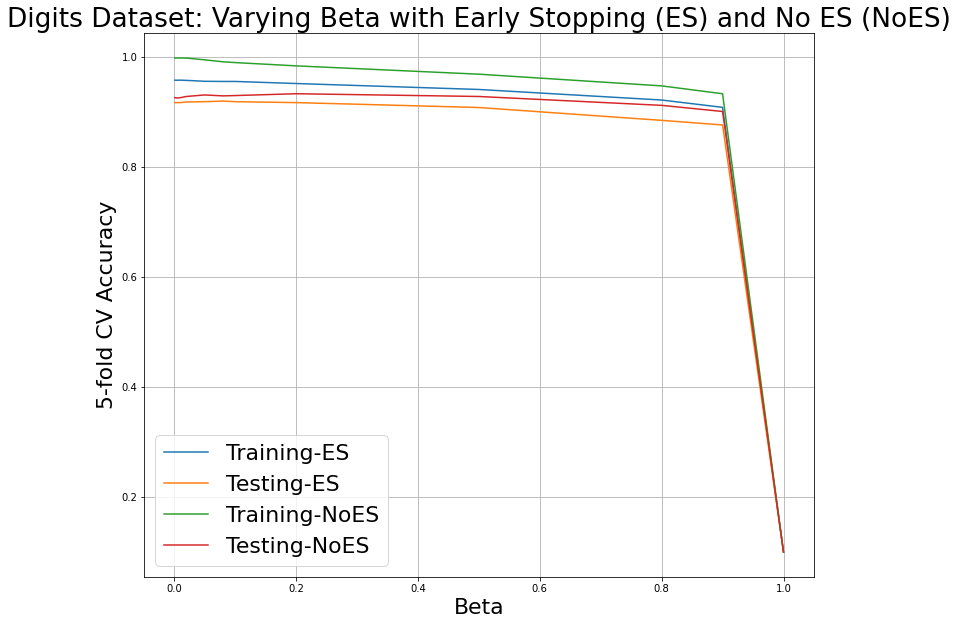

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.plot(betaList,betaTrainAccES)
plt.plot(betaList,betaTestAccES)
plt.plot(betaList,betaTrainAccNoES)
plt.plot(betaList,betaTestAccNoES)
plt.xlabel("Beta", fontsize=22)
plt.ylabel('5-fold CV Accuracy', fontsize=22)
plt.rcParams.update({'font.size': 22})
plt.title('Digits Dataset: Varying Beta with Early Stopping (ES) and No ES (NoES)')
plt.grid(True)
plt.legend(["Training-ES", "Testing-ES", "Training-NoES", "Testing-NoES"])
plt.show()

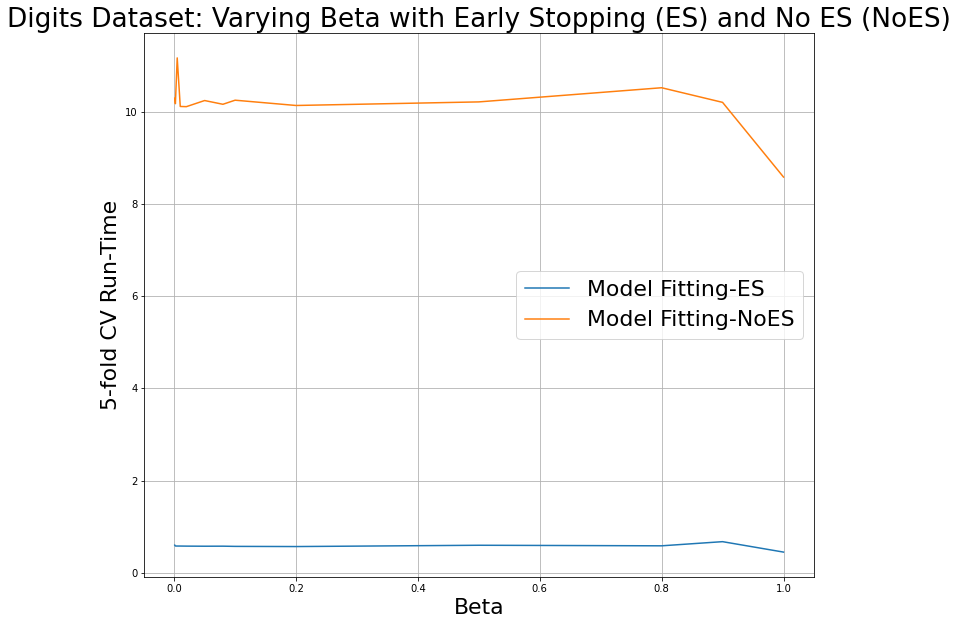

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.plot(betaList,betaRunTimeES)
plt.plot(betaList,betaRunTimeNoES)
plt.xlabel("Beta", fontsize=22)
plt.ylabel('5-fold CV Run-Time', fontsize=22)
plt.rcParams.update({'font.size': 22})
plt.title('Digits Dataset: Varying Beta with Early Stopping (ES) and No ES (NoES)')
plt.grid(True)
plt.legend(["Model Fitting-ES", "Model Fitting-NoES"])
plt.show()

# Isolet Dataset

In [ ]:
# Dataset 2: Hyperamater tunning for Learning Rate
betaList = [0.001, 0.005, 0.01, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1]

#TuningBeta(betaValue, lrValue, dX, dy, earlyStop):
# BEST Learning Rate: 0.2

betaTrainAccES2 = [] # Training accuracy results for Early stopping (ES)
betaTestAccES2 = [] # Validation accuracy results for Early stopping (ES)
betaRunTimeES2 = [] # Run-time results for Early stopping (ES)
betaTrainAccNoES2 = [] # Training accuracy results WITHOUT Early stopping (NoES)
betaTestAccNoES2 = [] # Validation accuracy results WITHOUT Early stopping (NoES)
betaRunTimeNoES2 = [] # Run-time results WITHOUT Early stopping (NoES)

import warnings
warnings.filterwarnings("ignore")

for ij in betaList:
  trainAc1, testAcc1, execTime1 = TuningBeta(ij, 0.2, bx, by, True)
  #trainAc2, testAcc2, execTime2 = TuningBeta(ij, 0.2, bx, by, False)
  print('beta=',ij,'; trainAcES=',trainAc1,'; testAccES=',testAcc1,'; execTimeES=',execTime1)
  #print('beta=',ij,'; trainAcNoES=',trainAc2,'; testAccNoES=',testAcc2,'; execTimeNoES=',execTime2)
  print('    ')
  betaTrainAccES2.append(trainAc1)
  betaTestAccES2.append(testAcc1)
  betaRunTimeES2.append(execTime1)
  #betaTrainAccNoES2.append(trainAc2)
  #betaTestAccNoES2.append(testAcc2)
  #betaRunTimeNoES2.append(execTime2)

beta= 0.001 ; trainAcES= 0.9578069894196858 ; testAccES= 0.9382937780628609 ; execTimeES= 37.5535254
    
beta= 0.005 ; trainAcES= 0.954953510740622 ; testAccES= 0.9370109044259142 ; execTimeES= 35.8686948
    
beta= 0.01 ; trainAcES= 0.9525809554344342 ; testAccES= 0.9344451571520205 ; execTimeES= 38.67631659999999
    
beta= 0.05 ; trainAcES= 0.9409746713690283 ; testAccES= 0.9258499037844773 ; execTimeES= 34.0056546
    
beta= 0.08 ; trainAcES= 0.9345623597306829 ; testAccES= 0.9178960872354074 ; execTimeES= 33.706385600000004
    
beta= 0.1 ; trainAcES= 0.9297531260019237 ; testAccES= 0.9127645926876203 ; execTimeES= 33.720095199999996
    
beta= 0.2 ; trainAcES= 0.9081115742225073 ; testAccES= 0.8936497754971136 ; execTimeES= 33.4966656
    
beta= 0.5 ; trainAcES= 0.85213209361975 ; testAccES= 0.8341244387427839 ; execTimeES= 33.7147838
    
beta= 0.8 ; trainAcES= 0.8038473869830074 ; testAccES= 0.7869146889031431 ; execTimeES= 33.526350199999996
    
beta= 1 ; trainAcES= 0.038473

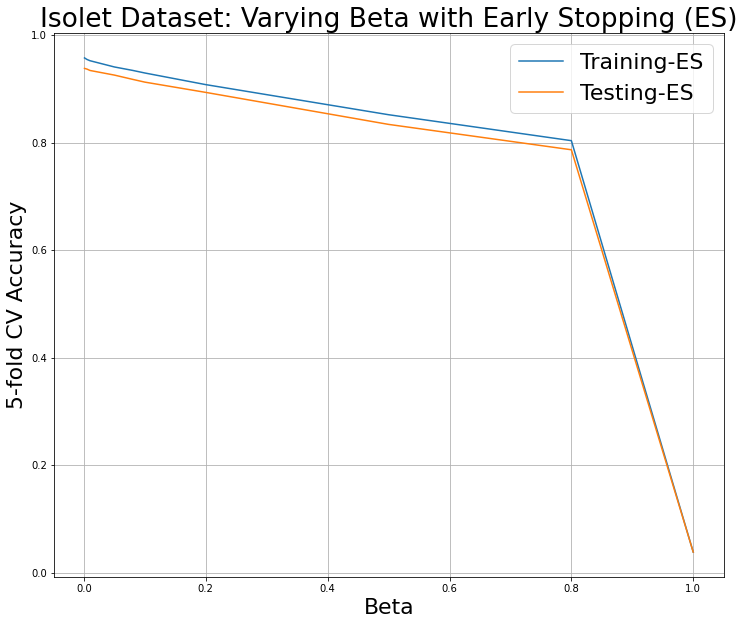

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.plot(betaList,betaTrainAccES2)
plt.plot(betaList,betaTestAccES2)
#plt.plot(betaList,betaTrainAccNoES2)
#plt.plot(betaList,betaTestAccNoES2)
plt.xlabel("Beta", fontsize=22)
plt.ylabel('5-fold CV Accuracy', fontsize=22)
plt.rcParams.update({'font.size': 22})
plt.title('Isolet Dataset: Varying Beta with Early Stopping (ES)')
#plt.title('Isolet Dataset: Varying Beta with Early Stopping (ES) and No ES (NoES)')
plt.grid(True)
plt.legend(["Training-ES", "Testing-ES"])
#plt.legend(["Training-ES", "Testing-ES", "Training-NoES", "Testing-NoES"])
plt.show()

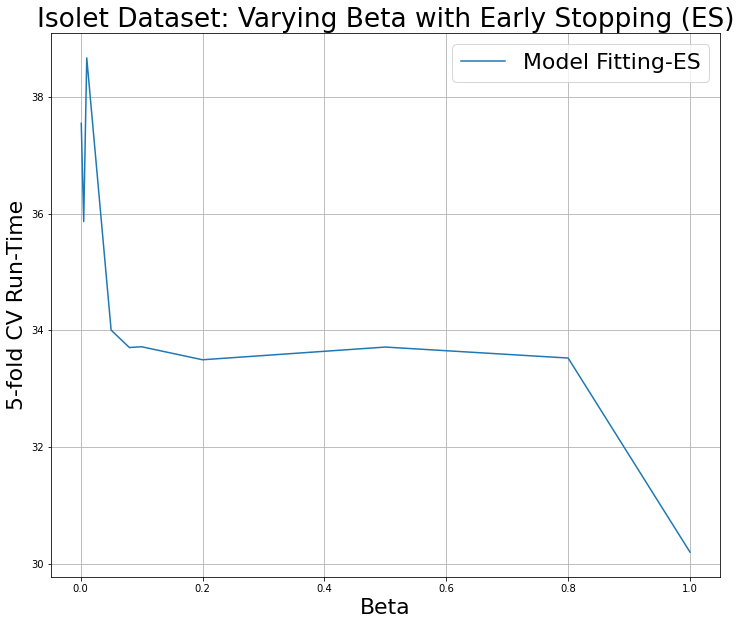

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.plot(betaList,betaRunTimeES2)
#plt.plot(betaList,betaRunTimeNoES2)
plt.xlabel("Beta", fontsize=22)
plt.ylabel('5-fold CV Run-Time', fontsize=22)
plt.rcParams.update({'font.size': 22})
plt.title('Isolet Dataset: Varying Beta with Early Stopping (ES)')
#plt.title('Isolet Dataset: Varying Beta with Early Stopping (ES) and No ES (NoES)')
plt.grid(True)
plt.legend(["Model Fitting-ES"])
#plt.legend(["Model Fitting-ES", "Model Fitting-NoES"])
plt.show()

# **Experiments with Batch Size**

In [ ]:
# USING EARLY STOPING with Varying Batch Size
# Set earlyStop using True/False

import numpy as np
import pandas as pd
from datetime import datetime

def TuningBatch(batchSize, betaValue, lrValue, dX, dy, earlyStop):

  optimizer = GradientDescent(learning_rate =lrValue, max_iters = 100, beta = betaValue, batch_size = batchSize, record_history = True, termination = earlyStop) # Tunning Learning Rate
  model = SoftmaxRegression()

  k=5 # Number of Cross Validation
  dXX=pd.DataFrame(dX)
  dYY=pd.DataFrame(dy)
  n= (len(dXX) // k)

  cvTrainAccuracy = []
  cvTestAccuracy = []
  cvRuntime = []

  for i in range(k):
    A=i*n
    B=(i+1)*n
    
    X1 = dXX[A:B].to_numpy()
    X2_1 = dXX[:A].to_numpy()
    X2_2 = dXX[B:].to_numpy()
    X2=np.concatenate((X2_1, X2_2), axis=0)
    
    X11 = dYY[A:B].values.flatten()
    X22_1 = dYY[:A].values.flatten()
    X22_2 = dYY[B:].values.flatten()
    X22=np.concatenate((X22_1, X22_2), axis=None)

    dX_train = X2
    dy_train = X22
    dX_test = X1
    dy_test = X11

    start=datetime.now()
    model.fit(dX_train, dy_train, optimizer, dX_test, dy_test)
    #model.fit(dX_train, dy_train, optimizer)
    
    saat = (datetime.now()-start).total_seconds()
    #print(saat)
    cvRuntime.append(saat)
    losses = optimizer.losses

    trainAccuracy = model.accuracy(dX_train,dy_train)
    cvTrainAccuracy.append(trainAccuracy)

    testAccuracy = model.accuracy(dX_test,dy_test)
    cvTestAccuracy.append(testAccuracy)

  KFold_TestAccuracy = np.mean(cvTestAccuracy);
  KFold_TrainAccuracy = np.mean(cvTrainAccuracy);
  KFold_RunTime = np.mean(cvRuntime);
  return KFold_TrainAccuracy, KFold_TestAccuracy, KFold_RunTime 


# Digit Dataset

In [ ]:
# Digit Dataset 1: Hyperamater tunning for Batch
batchList = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# TuningBatch(batchSize, betaValue, lrValue, dX, dy, earlyStop):
# BEST Learning Rate: 0.01
# BEST Beta: 0.08

batchTrainAccES = [] # Training accuracy results for Early stopping (ES)
batchTestAccES = [] # Validation accuracy results for Early stopping (ES)
batchRunTimeES = [] # Run-time results for Early stopping (ES)
batchTrainAccNoES = [] # Training accuracy results WITHOUT Early stopping (NoES)
batchTestAccNoES = [] # Validation accuracy results WITHOUT Early stopping (NoES)
batchRunTimeNoES = [] # Run-time results WITHOUT Early stopping (NoES)

import warnings
warnings.filterwarnings("ignore")

for ii in batchList:
  trainAc1, testAcc1, execTime1 = TuningBatch(ii, 0.08, 0.01, dX, dy, True)
  trainAc2, testAcc2, execTime2 = TuningBatch(ii, 0.08, 0.01, dX, dy, False)
  print('batch=',ii,'; trainAcES=',trainAc1,'; testAccES=',testAcc1,'; execTimeES=',execTime1)
  print('batch=',ii,'; trainAcNoES=',trainAc2,'; testAccNoES=',testAcc2,'; execTimeNoES=',execTime2)
  print('    ')
  batchTrainAccES.append(trainAc1)
  batchTestAccES.append(testAcc1)
  batchRunTimeES.append(execTime1)
  batchTrainAccNoES.append(trainAc2)
  batchTestAccNoES.append(testAcc2)
  batchRunTimeNoES.append(execTime2)

batch= 10 ; trainAcES= 0.9785813630041724 ; testAccES= 0.9292479108635098 ; execTimeES= 2.9539612
batch= 10 ; trainAcNoES= 0.9913769123783032 ; testAccNoES= 0.9298050139275766 ; execTimeNoES= 57.1438348
    
batch= 20 ; trainAcES= 0.9699582753824757 ; testAccES= 0.9259052924791087 ; execTimeES= 1.5421812000000001
batch= 20 ; trainAcNoES= 0.9913769123783032 ; testAccNoES= 0.9298050139275766 ; execTimeNoES= 28.360837000000004
    
batch= 30 ; trainAcES= 0.9639777468706537 ; testAccES= 0.9231197771587742 ; execTimeES= 1.0695970000000001
batch= 30 ; trainAcNoES= 0.9913769123783032 ; testAccNoES= 0.9303621169916434 ; execTimeNoES= 19.118736199999997
    
batch= 40 ; trainAcES= 0.9592489568845618 ; testAccES= 0.9208913649025069 ; execTimeES= 0.8061326
batch= 40 ; trainAcNoES= 0.9913769123783032 ; testAccNoES= 0.9298050139275766 ; execTimeNoES= 14.4068996
    
batch= 50 ; trainAcES= 0.9554937413073713 ; testAccES= 0.9197771587743733 ; execTimeES= 0.6709034
batch= 50 ; trainAcNoES= 0.991237830

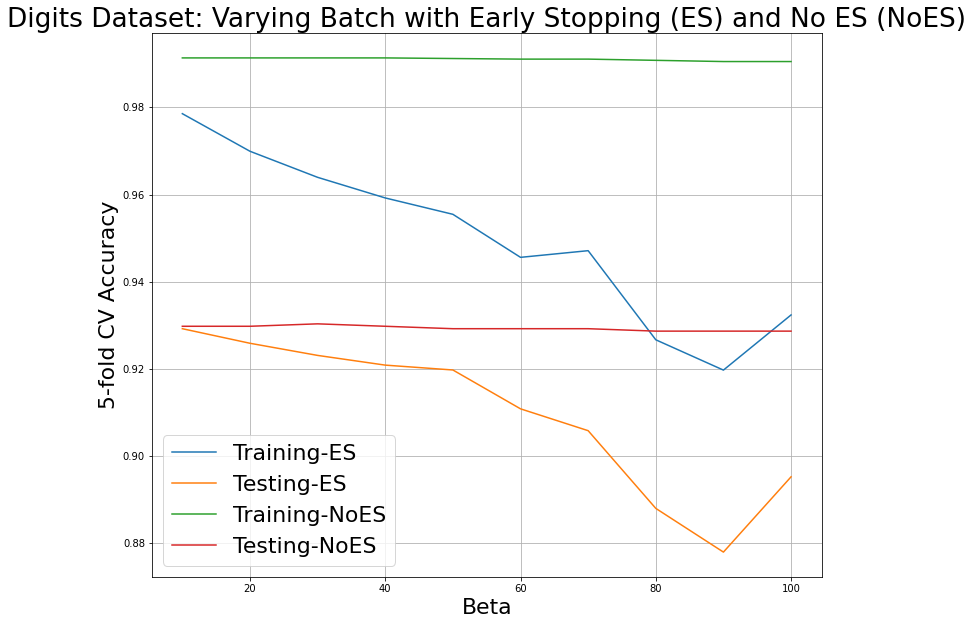

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.plot(batchList,batchTrainAccES)
plt.plot(batchList,batchTestAccES)
plt.plot(batchList,batchTrainAccNoES)
plt.plot(batchList,batchTestAccNoES)
plt.xlabel("Beta", fontsize=22)
plt.ylabel('5-fold CV Accuracy', fontsize=22)
plt.rcParams.update({'font.size': 22})
plt.title('Digits Dataset: Varying Batch with Early Stopping (ES) and No ES (NoES)')
plt.grid(True)
plt.legend(["Training-ES", "Testing-ES", "Training-NoES", "Testing-NoES"])
plt.show()

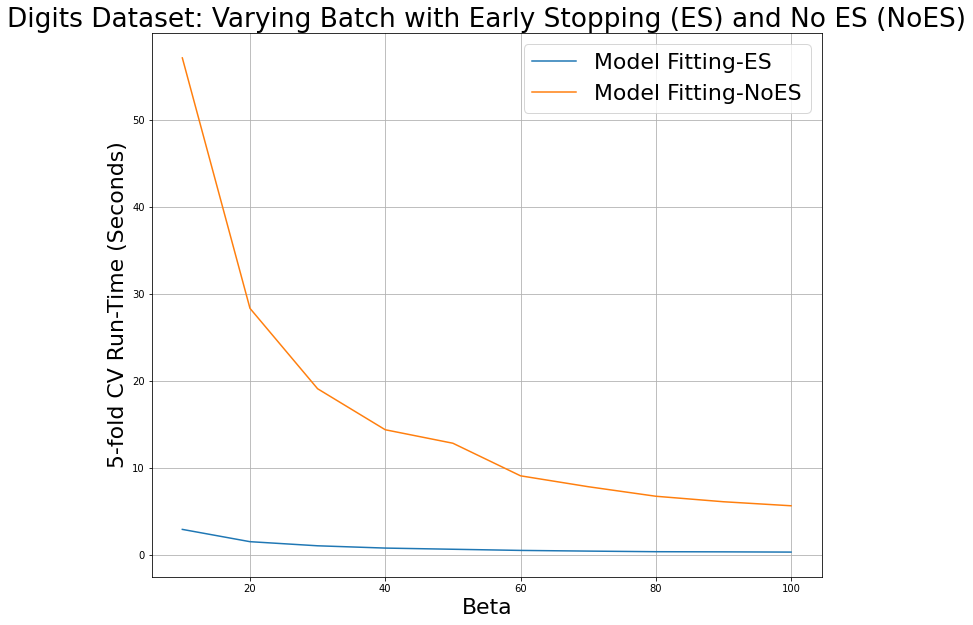

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.plot(batchList,batchRunTimeES)
plt.plot(batchList,batchRunTimeNoES)
plt.xlabel("Beta", fontsize=22)
plt.ylabel('5-fold CV Run-Time (Seconds)', fontsize=22)
plt.rcParams.update({'font.size': 22})
plt.title('Digits Dataset: Varying Batch with Early Stopping (ES) and No ES (NoES)')
plt.grid(True)
plt.legend(["Model Fitting-ES", "Model Fitting-NoES"])
plt.show()

# Isolet Dataset

In [ ]:
# Digit Dataset 1: Hyperamater tunning for Batch
batchList = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# TuningBatch(batchSize, betaValue, lrValue, dX, dy, earlyStop):
# BEST Learning Rate: 0.2
# BEST Beta: 0.05

batchTrainAccES2 = [] # Training accuracy results for Early stopping (ES)
batchTestAccES2 = [] # Validation accuracy results for Early stopping (ES)
batchRunTimeES2 = [] # Run-time results for Early stopping (ES)
batchTrainAccNoES2 = [] # Training accuracy results WITHOUT Early stopping (NoES)
batchTestAccNoES2 = [] # Validation accuracy results WITHOUT Early stopping (NoES)
batchRunTimeNoES2 = [] # Run-time results WITHOUT Early stopping (NoES)

import warnings
warnings.filterwarnings("ignore")

for ii in batchList:
  trainAc1, testAcc1, execTime1 = TuningBatch(ii, 0.05, 0.2, bx, by, True)
  #trainAc2, testAcc2, execTime2 = TuningBatch(ii, 0.05, 0.2, dX, dy, False)
  print('batch=',ii,'; trainAcES=',trainAc1,'; testAccES=',testAcc1,'; execTimeES=',execTime1)
  #print('batch=',ii,'; trainAcNoES=',trainAc2,'; testAccNoES=',testAcc2,'; execTimeNoES=',execTime2)
  print('    ')
  batchTrainAccES2.append(trainAc1)
  batchTestAccES2.append(testAcc1)
  batchRunTimeES2.append(execTime1)
  #batchTrainAccNoES2.append(trainAc2)
  #batchTestAccNoES2.append(testAcc2)
  #batchRunTimeNoES2.append(execTime2)

batch= 10 ; trainAcES= 0.9455915357486374 ; testAccES= 0.9294419499679283 ; execTimeES= 176.04239339999998
    
batch= 20 ; trainAcES= 0.945399166399487 ; testAccES= 0.9291853752405388 ; execTimeES= 87.1764014
    
batch= 30 ; trainAcES= 0.94434113497916 ; testAccES= 0.9286722257857601 ; execTimeES= 57.702925400000005
    
batch= 40 ; trainAcES= 0.9426098108368066 ; testAccES= 0.927902501603592 ; execTimeES= 43.4404336
    
batch= 50 ; trainAcES= 0.9409746713690283 ; testAccES= 0.9258499037844773 ; execTimeES= 34.75874879999999
    
batch= 60 ; trainAcES= 0.9396922090413593 ; testAccES= 0.9234124438742783 ; execTimeES= 29.843167
    
batch= 70 ; trainAcES= 0.9374158384097466 ; testAccES= 0.9223861449647209 ; execTimeES= 24.9264444
    
batch= 80 ; trainAcES= 0.9352677140109009 ; testAccES= 0.9200769724182167 ; execTimeES= 21.843032799999996
    
batch= 90 ; trainAcES= 0.9337608207758897 ; testAccES= 0.91879409878127 ; execTimeES= 19.4919754
    
batch= 100 ; trainAcES= 0.93193331195896

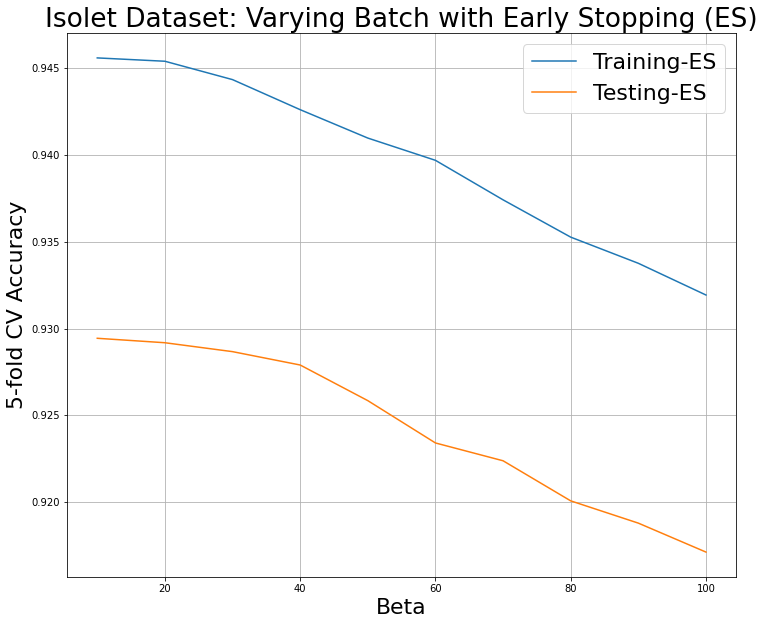

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.plot(batchList,batchTrainAccES2)
plt.plot(batchList,batchTestAccES2)
#plt.plot(batchList,batchTrainAccNoES2)
#plt.plot(batchList,batchTestAccNoES2)
plt.xlabel("Beta", fontsize=22)
plt.ylabel('5-fold CV Accuracy', fontsize=22)
plt.rcParams.update({'font.size': 22})
plt.title('Isolet Dataset: Varying Batch with Early Stopping (ES)')
#plt.title('Isolet Dataset: Varying Batch with Early Stopping (ES) and No ES (NoES)')
plt.grid(True)
plt.legend(["Training-ES", "Testing-ES"])
#plt.legend(["Training-ES", "Testing-ES", "Training-NoES", "Testing-NoES"])
plt.show()

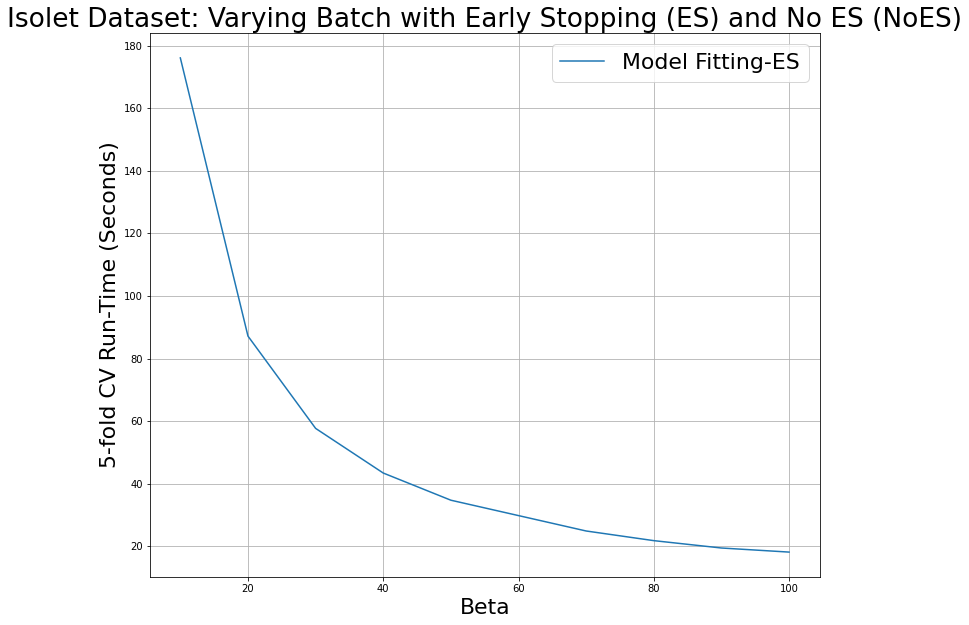

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.plot(batchList,batchRunTimeES2)
#plt.plot(batchList,batchRunTimeNoES2)
plt.xlabel("Beta", fontsize=22)
plt.ylabel('5-fold CV Run-Time (Seconds)', fontsize=22)
plt.rcParams.update({'font.size': 22})
plt.title('Isolet Dataset: Varying Batch with Early Stopping (ES) and No ES (NoES)')
#plt.title('Isolet Dataset: Varying Batch with Early Stopping (ES) and No ES (NoES)')
plt.grid(True)
plt.legend(["Model Fitting-ES"])
#plt.legend(["Model Fitting-ES", "Model Fitting-NoES"])
plt.show()

# **Other Classifier for Comparison**

In [ ]:
# KNN Regressor Function with specified K

import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

def KnnProject(neigbour, dX, dy):
  k=5 
  dXX=pd.DataFrame(dX) 
  dYY=pd.DataFrame(dy) 
  n= (len(dXX) // k)
  cvTestAccuracy = []
  cvTrainAccuracy = []

  for i in range(k):
    A,B = i*n, (i+1)*n

    # features
    X1 = dXX[A:B].to_numpy() 
    X2_1 = dXX[:A].to_numpy() 
    X2_2 = dXX[B:].to_numpy() 
    X2=np.concatenate((X2_1, X2_2), axis=0) 
    
    # labels
    X11 = dYY[A:B].values.flatten() 
    X22_1 = dYY[:A].values.flatten() 
    X22_2 = dYY[B:].values.flatten() 
    X22=np.concatenate((X22_1, X22_2), axis=None)
    
    # kth features & labels
    dX_train = X2 
    dy_train = X22 
    dX_test = X1 
    dy_test = X11

    # Create classifier
    knn = KNeighborsRegressor(n_neighbors=neigbour)
    knn.fit(dX_train, dy_train)

    trainAccuracy = knn.score(dX_train, dy_train)
    cvTrainAccuracy.append(trainAccuracy)

    testAccuracy = knn.score(dX_test,dy_test)
    cvTestAccuracy.append(testAccuracy)

  KFold_TestAccuracy = np.mean(cvTestAccuracy);
  KFold_TrainAccuracy = np.mean(cvTrainAccuracy);
  return KFold_TestAccuracy, KFold_TrainAccuracy


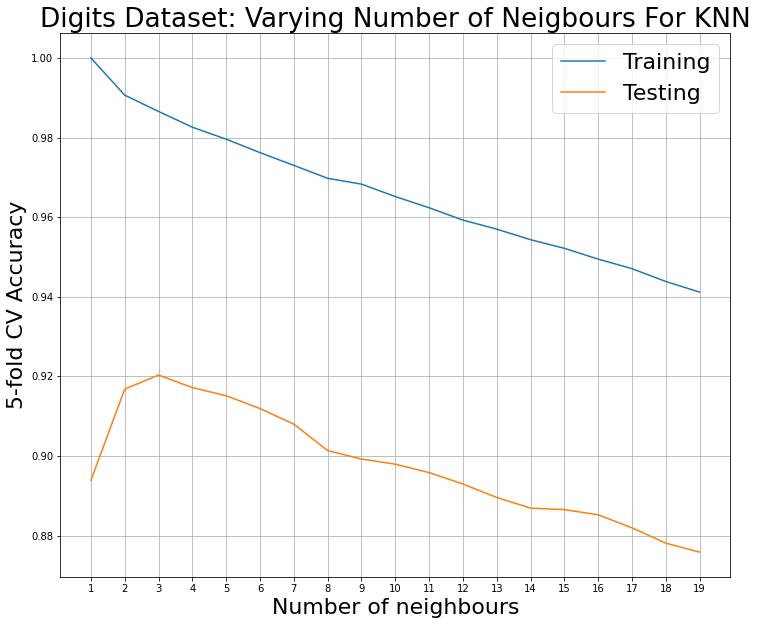

In [ ]:
# Digits Dataset

neigbour = range(1,20)
KnnScoreTrain = []
KnnScoreTest = []

for k in neigbour:
  KnnTest, KnnTrain = KnnProject(k, dX, dy)
  KnnScoreTrain.append(KnnTrain)
  KnnScoreTest.append(KnnTest)


import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.xticks(np.arange(min(neigbour), max(neigbour)+1, 1.0))
plt.plot(neigbour,KnnScoreTrain)
plt.plot(neigbour,KnnScoreTest)
plt.rcParams.update({'font.size': 22})
plt.title('Digits Dataset: Varying Number of Neigbours For KNN')
plt.xlabel("Number of neighbours",fontsize=22)
plt.ylabel('5-fold CV Accuracy',fontsize=22)
plt.legend(["Training", "Testing"])
plt.grid(True)
plt.show()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


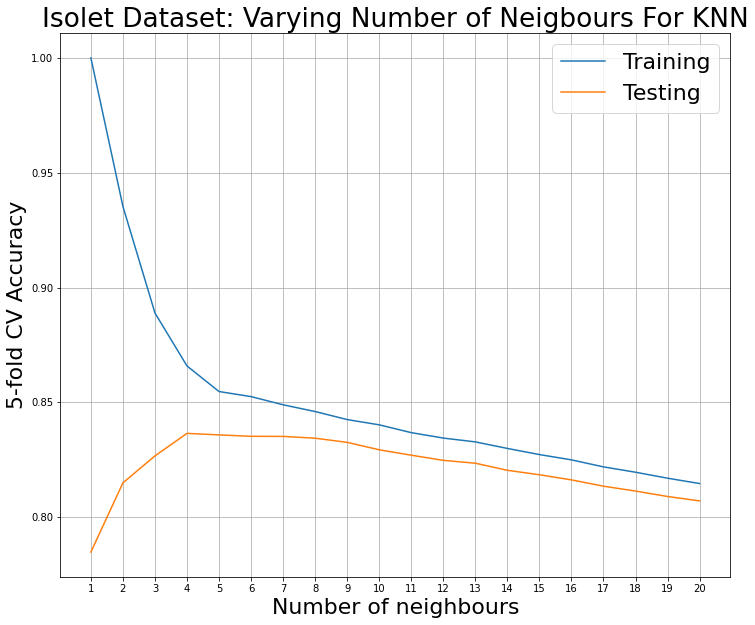

In [ ]:
# Isolet Dataset

neigbour = range(1,21)
KnnScoreTrain2 = []
KnnScoreTest2 = []

for k in neigbour:
  print(k)
  KnnTest, KnnTrain = KnnProject(k, bx, by)
  KnnScoreTrain2.append(KnnTrain)
  KnnScoreTest2.append(KnnTest)


import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
plt.xticks(np.arange(min(neigbour), max(neigbour)+1, 1.0))
plt.plot(neigbour,KnnScoreTrain2)
plt.plot(neigbour,KnnScoreTest2)
plt.rcParams.update({'font.size': 22})
plt.title('Isolet Dataset: Varying Number of Neigbours For KNN')
plt.xlabel("Number of neighbours",fontsize=22)
plt.ylabel('5-fold CV Accuracy',fontsize=22)
plt.legend(["Training", "Testing"])
plt.grid(True)
plt.show()